In [1]:
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data as pdr 
import numpy as np 
import datetime as dt 
import yfinance as yfin
import scipy
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

C:\Users\16308\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
yfin.pdr_override()

In [3]:
tickers = ['AAPL', 'FB', 'C', 'DIS']

In [4]:
weights = np.array([.25, .3, .15, .3])

In [5]:
initial_investment = 1000000

In [6]:
data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']

[*********************100%***********************]  4 of 4 completed


In [7]:
returns = data.pct_change()

In [8]:
returns.head()

,AAPL,C,DIS,FB
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.003093,0.004293,0.017914
2018-01-04,0.004645,0.012334,-0.000445,-0.001841
2018-01-05,0.011385,-0.001324,-0.005435,0.013671
2018-01-08,-0.003714,-0.011670,-0.014334,0.007653


In [9]:
returns.tail()

,AAPL,C,DIS,FB
Date,,,,
2022-01-14,0.005111,-0.012541,-0.022517,0.016601
2022-01-18,-0.018894,-0.024354,0.002172,-0.041428
2022-01-19,-0.021025,-0.016233,-0.014185,0.004526
2022-01-20,-0.010347,0.003425,-0.016588,-0.009481
2022-01-21,-0.012765,-0.018461,-0.069367,-0.042298


In [10]:
cov_matrix = returns.cov()

In [11]:
cov_matrix

,AAPL,C,DIS,FB
AAPL,0.000427,0.000240,0.000176,0.000283
C,0.000240,0.000632,0.000309,0.000216
DIS,0.000176,0.000309,0.000394,0.000171
FB,0.000283,0.000216,0.000171,0.000516


In [12]:
# Calculate mean returns for each stock
avg_rets = returns.mean()

In [13]:
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)

In [14]:
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [15]:
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment

In [16]:
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [17]:
# Select our confidence interval (I'll choose 95% and 99% here)
conf_level1 = 0.05
conf_level2 = 0.01

In [18]:
# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


In [19]:
cutoff2 = norm.ppf(conf_level2, mean_investment, stdev_investment)

In [20]:
var_1d1 = initial_investment - cutoff1
var_1d1

28360.172010574024

In [21]:
var_2d2 = initial_investment - cutoff2
var_2d2

40406.68279905489

In [22]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

1 day VaR @ 95% confidence: 28360.17
2 day VaR @ 95% confidence: 40107.34
3 day VaR @ 95% confidence: 49121.26
4 day VaR @ 95% confidence: 56720.34
5 day VaR @ 95% confidence: 63415.27
6 day VaR @ 95% confidence: 69467.95
7 day VaR @ 95% confidence: 75033.96
8 day VaR @ 95% confidence: 80214.68
9 day VaR @ 95% confidence: 85080.52
10 day VaR @ 95% confidence: 89682.74
11 day VaR @ 95% confidence: 94060.05
12 day VaR @ 95% confidence: 98242.52
13 day VaR @ 95% confidence: 102254.05
14 day VaR @ 95% confidence: 106114.05
15 day VaR @ 95% confidence: 109838.47


In [23]:
var_array2 = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array2.append(np.round(var_2d2 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 99% confidence: " + str(np.round(var_2d2 * np.sqrt(x),2)))

1 day VaR @ 99% confidence: 40406.68
2 day VaR @ 99% confidence: 57143.68
3 day VaR @ 99% confidence: 69986.43
4 day VaR @ 99% confidence: 80813.37
5 day VaR @ 99% confidence: 90352.09
6 day VaR @ 99% confidence: 98975.76
7 day VaR @ 99% confidence: 106906.03
8 day VaR @ 99% confidence: 114287.36
9 day VaR @ 99% confidence: 121220.05
10 day VaR @ 99% confidence: 127777.15
11 day VaR @ 99% confidence: 134013.81
12 day VaR @ 99% confidence: 139972.86
13 day VaR @ 99% confidence: 145688.37
14 day VaR @ 99% confidence: 151187.96
15 day VaR @ 99% confidence: 156494.41


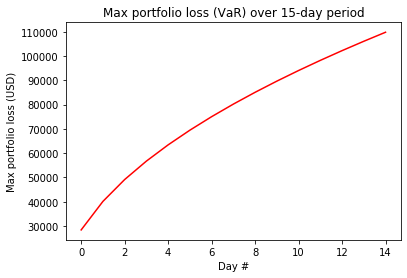

In [24]:
# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

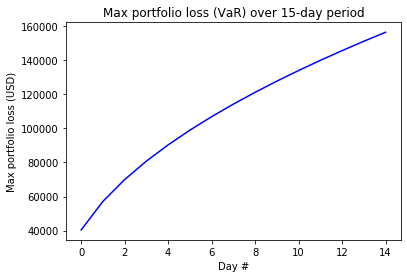

In [30]:
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array2, "b")

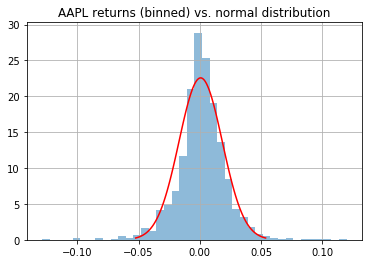

In [26]:
# Repeat for each equity in portfolio
returns['AAPL'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

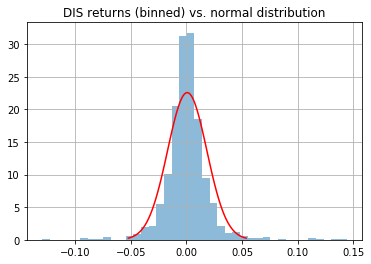

In [27]:
returns['DIS'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("DIS returns (binned) vs. normal distribution")
plt.show()

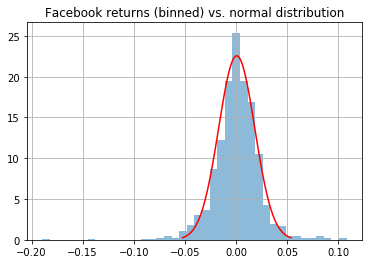

In [28]:
returns['FB'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("Facebook returns (binned) vs. normal distribution")
plt.show()

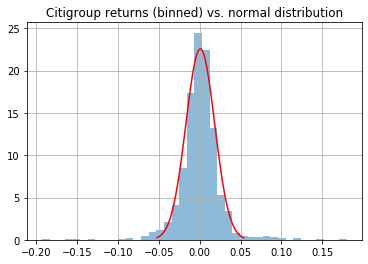

In [29]:
returns['C'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("Citigroup returns (binned) vs. normal distribution")
plt.show()